### Group members:
- Shah, Harsh Rajeshkumar
- Ngo, Xuan Thi 

### Analytic Computing Class 2020

# <font size =18> <center> <span style="color:drak"> Credit Card Customer Segmentation </span> <center> </font>

# Table of Contents
* [A. Exploratory Data Analysis](#A)
    * [1. Objective of the Proposed Research](#Objective)

    * [2. Data Exploration](#data_exploration)
    
    * [3. Data Cleaning](#data_cleaning)

    * [4. Adaptation](#adaptation)

* [B. Visualization](#B)
    * [ 5. Descriptive Visualization](#Descriptive)
    
* [C. Cluster Analysis](#C)
    * [ 6. Step-by-step hierarchical clustering](#6)
    * [7. Dendrogram](#7)
* [D. Unsupervised Clustering](#D)
    * [8. Step-by-step K-means](#8)
    * [ 9. sklearn.cluster:](#9)
* [E. Supervised Clustering](#E)  
    * [10. kNN Function](#10)
* [F. Findings](#F)
    * [11. Project Report](#11)
* [G. Originality](#G) 

# A. Exploratory Data Analysis <a class="anchor" id="A"></a> 



## 1. Objective of the Proposed Research<a class="anchor" id="Objective"></a> 

Credit card data are rich in terms of both volume and variety, providing insights into both customer shopping and payment preferences. Billions and Billions of transactions take place each year, creating billions of opportunities to understand customers better. Surprisingly, many banks don't use this wealth of information. Instead, they opt for mass marketing and costly above-the-line communications.

In this project, our stakeholder is **Chase Bank**, Customer Segmentation department. Customer Segmentation is one of the most fundamental building blocks in getting to know customers. Customer segmentation can be defined as the action of grouping similar customers into categories with the objective of customizing offerings and actions based on their profiles. The output is a list of customers, each tagged with segment flags using a segmentation ‘model’. It is essential for industries where customer interaction is frequent and varied, as each interaction provides insight into opportunities and risks for every individual. The credit card industry is one of them as the industry gains significant ROI from segmentation initiatives.


we will use python to analyze the data. First of all we will look into some features such as 'CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', and so on to get the ins and outs of the data. Then, we will visualize them to have  clearer pictures. Moreover, we concentrate on creating different clusters to get more information in order to to develop a customer segmentation.

##  2. Data Exploration<a class="anchor" id="data_exploration"></a> 


In [2]:
#needed package
import pandas as pd
import numpy as np
#for plot
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
np.zeros(3)

array([0., 0., 0.])

In [2]:
#load data
credit_df = pd.read_csv("CC GENERAL.csv").set_index('CUST_ID')
credit_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#print out columns' names
credit_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

The detail infomation columns' names:

- **CUSTID**: Identification of Credit Card holder (Categorical)

- **BALANCE**: Balance amount left in their account to make purchases 

- **BALANCEFREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

- **PURCHASES**: Amount of purchases made from account

- **ONEOFFPURCHASES**: Maximum purchase amount done in one-go

- **INSTALLMENTSPURCHASES**: Amount of purchase done in installment

- **CASHADVANCE**: Cash in advance given by the user

- **PURCHASESFREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

- **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

- **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid

- **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"

- **PURCHASESTRX**: Numbe of purchase transactions made

- **CREDITLIMIT**: Limit of Credit Card for user

- **PAYMENTS**: Amount of Payment done by user

- **MINIMUM_PAYMENTS**: Minimum amount of payments made by user

- **PRCFULLPAYMENT**: Percent of full payment paid by user

- **TENURE**: Tenure of credit card service for user

In [4]:
#shape of data
credit_df.shape

(8950, 17)

In [5]:
#feature description for numericalcolumnss 
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


The above table shows us information of numerical columns such as minimum, maximum and mean values. For example, we can see the `BALENCE` column has the minimum values is 0 and maximum values is around 19043; or `BALANCE_FREQUENCY` is from 0 to 1.

In [6]:
#information of data 
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

## 3. Data Cleaning<a class="anchor" id="data_cleaning"></a> 
Clean the data, removing rows and columns that have no useful information or no information at all.

In [7]:
#I just choose 4000 random rows from now which easier for Dandrogram run later
credit_df = credit_df.sample(4000, random_state=90)
credit_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C17580,384.803407,1.0,549.00,291.00,258.00,0.000000,0.500000,0.083333,0.416667,0.000000,0,9,1000.0,569.597465,610.732047,0.000000,12
C10289,1473.495809,1.0,414.00,0.00,414.00,0.000000,0.750000,0.000000,0.666667,0.000000,0,9,10500.0,5863.940340,570.250342,0.500000,12
C14417,4988.093733,1.0,8581.29,4640.84,3940.45,225.473003,1.000000,0.666667,1.000000,0.083333,1,94,10500.0,1571.883000,1133.733957,0.000000,12
C17426,3840.505780,1.0,0.00,0.00,0.00,5558.961557,0.000000,0.000000,0.000000,0.500000,20,0,5500.0,4608.621771,904.882748,0.000000,12
C19097,227.220411,1.0,1387.60,288.54,1099.06,107.660394,1.000000,0.875000,0.875000,0.125000,1,71,1000.0,1217.473837,136.283049,0.142857,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C15914,1474.532261,1.0,106.00,106.00,0.00,36.308611,0.083333,0.083333,0.000000,0.083333,2,2,3000.0,349.349174,434.513783,0.000000,12
C16035,478.530825,1.0,0.00,0.00,0.00,96.176909,0.000000,0.000000,0.000000,0.250000,4,0,500.0,175.481779,191.857980,0.000000,12
C16558,75.462030,1.0,405.84,0.00,405.84,0.000000,1.000000,0.000000,1.000000,0.000000,0,45,5000.0,340.762855,171.488095,0.083333,12


In [8]:
#drop out the columns that have no use in our project


df = credit_df[[ 'BALANCE', 'PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS','INSTALLMENTS_PURCHASES' , 'ONEOFF_PURCHASES']]
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES
CUST_ID,,,,,,,,
C17580,384.803407,549.00,0.000000,1000.0,569.597465,610.732047,258.00,291.00
C10289,1473.495809,414.00,0.000000,10500.0,5863.940340,570.250342,414.00,0.00
C14417,4988.093733,8581.29,225.473003,10500.0,1571.883000,1133.733957,3940.45,4640.84
C17426,3840.505780,0.00,5558.961557,5500.0,4608.621771,904.882748,0.00,0.00
C19097,227.220411,1387.60,107.660394,1000.0,1217.473837,136.283049,1099.06,288.54


In [9]:
#NA in each column
na_col = df.isnull().sum()
na_col

BALANCE                     0
PURCHASES                   0
CASH_ADVANCE                0
CREDIT_LIMIT                1
PAYMENTS                    0
MINIMUM_PAYMENTS          142
INSTALLMENTS_PURCHASES      0
ONEOFF_PURCHASES            0
dtype: int64

In [10]:
#Percentage of total NA values to the total values of data
(df.isnull().sum().sum()/len(df))*100

3.5749999999999997

We can see that the total percentage of missing value is 3.5% which is pretty high comparing to our data. Moreover, most of the missing values come from `MINIMUM_PAYMENTS` column, if we drop 313 rows that will be a big change. Thus, we decide to replace it with the median values. 

In [103]:
#MINIMUM_PAYMENTS column 
df.loc[:,'MINIMUM_PAYMENTS']= df.loc[:,'MINIMUM_PAYMENTS'].fillna((df.loc[:,'MINIMUM_PAYMENTS'].median()))

#CREDIT_LIMIT
df.loc[:,'CREDIT_LIMIT'] = df.loc[:,'CREDIT_LIMIT'].fillna((df.loc[:,'CREDIT_LIMIT'].median()))

In [104]:
#checking null value once more time
df.isnull().sum().sum()

0

In [105]:
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,Utilization.Ratio(%),Balance_Change,Purchase_Type,Fraction_of_amount_paid,Utilization.Ratio
CUST_ID,,,,,,,,,,,,,
C17580,384.803407,549.00,0.000000,1000.0,569.597465,610.732047,258.00,291.00,38.480341,20.597465,both_oneoff_installment,0.932647,0.384803
C10289,1473.495809,414.00,0.000000,10500.0,5863.940340,570.250342,414.00,0.00,14.033293,5449.940340,installment,10.283098,0.140333
C14417,4988.093733,8581.29,225.473003,10500.0,1571.883000,1133.733957,3940.45,4640.84,47.505655,-7009.407000,both_oneoff_installment,1.386465,0.475057
C17426,3840.505780,0.00,5558.961557,5500.0,4608.621771,904.882748,0.00,0.00,69.827378,4608.621771,none,5.093060,0.698274
C19097,227.220411,1387.60,107.660394,1000.0,1217.473837,136.283049,1099.06,288.54,22.722041,-170.126163,both_oneoff_installment,8.933421,0.227220


Our data is clean now. We are good to go!

## 4. Adaptation<a class="anchor" id="adaptation"></a> 
Create at least two additional columns that are necessary for your study. They can be calculated columns or aggregated columns.

##### 4.1 Ultilization ratio

$$Ultilization.ratio  = \frac{Balance}{Credit.Limit} \times 100$$

 Generally, a low credit utilization ratio is considered an indicator that you're doing a good job of managing your credit responsibilities because you're far from overspending. A higher rate, however, could be a flag to potential lenders or creditors that you're having trouble managing your finances.

In [107]:
df.loc[:,'Utilization.Ratio(%)'] = (df.loc[:,'BALANCE'].values/df.loc[:,'CREDIT_LIMIT'].values)*100

##### 4.2  Balance change
$$New.Balance = Old.Balance - Payments + Purchases$$

In this case we want to see what are the Previous Balance of these 8950 users. For that we can calculate the change of  thier Balance during 6 months. 

$$ Old.Balance = New.Balance + Payments - Purchases$$



In [88]:
# Old Balance
old  = df.loc[:,'BALANCE'] - df.loc[:,'PAYMENTS'] + df.loc[:,'PURCHASES']

#Balance Change
df.loc[:,'Balance_Change'] = df.loc[:,'BALANCE'].values - old


#### 4.3. Types of Purchases(one-off, installments)

In [89]:
df[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].tail()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
CUST_ID,,
C15914,106.00,0.00
C16035,0.00,0.00
C16558,0.00,405.84
C18774,1131.46,0.00
C11032,0.00,160.92


Here, we can see that there are customers having different values of oneoff and installment purchases. Some customers do purchases only in installments whereas some other customers do only oneoff_purchases. Also, there are customers who do both types of purchases and others do none. Based on the available data multiple combinations can be formed and categorical variables can be derived.

In [108]:
def purchase(df):
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [113]:
df['Purchase_Type'] = df.apply(purchase, axis=1)
df['Purchase_Type'].value_counts()

<ipython-input-113-9eb52701097f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchase_Type'] = df.apply(purchase, axis=1)


both_oneoff_installment    1266
installment                1008
none                        888
one_off                     838
Name: Purchase_Type, dtype: int64

Based on the purchase type, we have formed the above four types of customers.

#### 4.4. Ratio of amount paid to the minimum amount due

In [115]:
df['Fraction_of_amount_paid'] = df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'], axis=1)
df['Fraction_of_amount_paid']

<ipython-input-115-0a7c553c37fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fraction_of_amount_paid'] = df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'], axis=1)


CUST_ID
C17580     0.932647
C10289    10.283098
C14417     1.386465
C17426     5.093060
C19097     8.933421
            ...    
C15914     0.804000
C16035     0.914644
C16558     1.987093
C18774    13.412325
C11032     1.040390
Name: Fraction_of_amount_paid, Length: 4000, dtype: float64

In [116]:
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,Utilization.Ratio(%),Balance_Change,Purchase_Type,Fraction_of_amount_paid,Utilization.Ratio
CUST_ID,,,,,,,,,,,,,
C17580,384.803407,549.00,0.000000,1000.0,569.597465,610.732047,258.00,291.00,38.480341,20.597465,both_oneoff_installment,0.932647,0.384803
C10289,1473.495809,414.00,0.000000,10500.0,5863.940340,570.250342,414.00,0.00,14.033293,5449.940340,installment,10.283098,0.140333
C14417,4988.093733,8581.29,225.473003,10500.0,1571.883000,1133.733957,3940.45,4640.84,47.505655,-7009.407000,both_oneoff_installment,1.386465,0.475057
C17426,3840.505780,0.00,5558.961557,5500.0,4608.621771,904.882748,0.00,0.00,69.827378,4608.621771,none,5.093060,0.698274
C19097,227.220411,1387.60,107.660394,1000.0,1217.473837,136.283049,1099.06,288.54,22.722041,-170.126163,both_oneoff_installment,8.933421,0.227220


#  B. Visualization<a class="anchor" id="B"></a> 

## 5. Descriptive Visualization<a class="anchor" id="Descriptive"></a> 

Create a few (at least 4) distinct relevant static visualizations that show different clusters of the data. Two visualizations of the same kind (e.g. two scatter plots) are not considered distinct. You can use any of the libraries or examples covered in class, or you can research your own examples

#### 5.1 First Visualization

(-100.0, 6000.0)

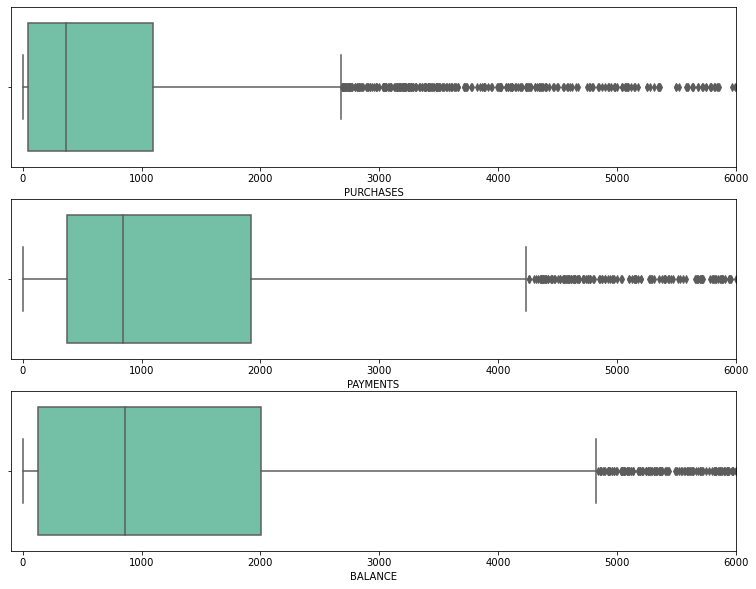

In [21]:
plt.figure(figsize=(13,10))

plt.subplot(313)
ax1 = sns.boxplot(x=df["BALANCE"], color = 'mediumaquamarine')
ax1.set_xlim(-100, 6000)

plt.subplot(311)
ax5 = sns.boxplot(x=df["PURCHASES"], color = 'mediumaquamarine')
ax5.set_xlim(-100, 6000)

plt.subplot(312)
ax5 = sns.boxplot(x=df["PAYMENTS"], color = 'mediumaquamarine')
ax5.set_xlim(-100, 6000)

These box plots to show distributions of `PURCHASE`, `PAYMENTS`, and `BALANCE`.

#### 5.2 Second Visualization

In [22]:
#sum the negative balance change 
neg_Balance_change = df['Balance_Change'] < 0
sum(neg_Balance_change)

1235

In [23]:
#sum the positive balance change 
pos_Balance_change = df['Balance_Change'] >= 0
sum(pos_Balance_change)

2765

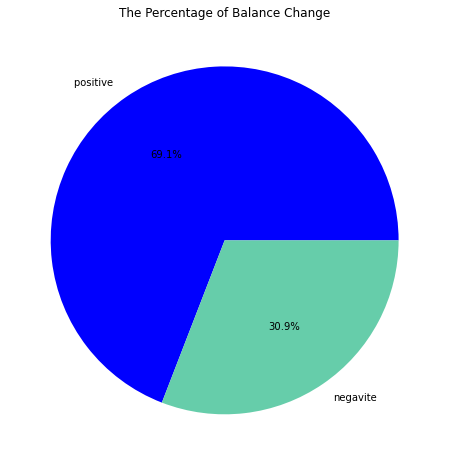

In [24]:

data = [(sum(pos_Balance_change)/len(df))*100,(sum(neg_Balance_change)/len(df))*100 ]
label = 'positive ', 'negavite'

  
# Creating plot 
fig = plt.figure(figsize =(14, 8)) 
plt.pie(data, labels = label, autopct='%1.1f%%', colors =[ 'blue', 'mediumaquamarine'])
plt.title('The Percentage of Balance Change')
# show plot 
plt.show() 


Form the pie chart above, 69.1% positive means that 69.1%  of credit card holders tented to have the **PURCHASES** larger than  **PAYMENTS**  after the 6 months. In contrast, the percentage of users that made **PAYMENTS** larger than perchasing during the 6 months was 30.9%.

#### 5. 3. Visualization 3

Text(0.5, 1.0, 'The frequency of Utilization Ratio(%)')

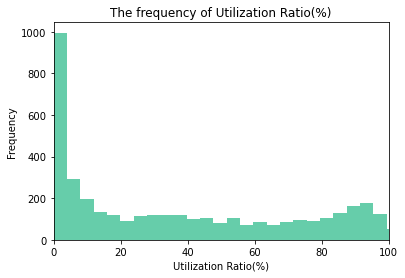

In [25]:
#Revolving Credit
fig, ax = plt.subplots()

x = df['Utilization.Ratio(%)'].values

ax.hist(x, bins = 400,facecolor='mediumaquamarine')

ax.set_xlim(0, 100)
ax.set_ylabel('Frequency')
ax.set_xlabel('Utilization Ratio(%)')
ax.set_title('The frequency of Utilization Ratio(%)')


From the preceding plot, we obtain that the highest frequency of Utilization Ratio collected in this dataset belongs to the card holders who have the **Utilization Ratio** from 0 to 10 percent. In other words, around 1000 users had low credit utilization ratio. Moreover, approximately 500 users had high credt utilization, 85%-100%. 

#### 5.4. Visualization 4 - Mean fraction of amount paid by each type of customer

In [26]:
x=df.groupby('Purchase_Type').apply(lambda x: np.mean(x['Fraction_of_amount_paid']))
type(x)
x.values

array([ 7.04888551, 16.534156  ,  7.82155542,  6.03133472])

Text(0.5, 1.0, 'Mean fraction of amount paid by each type of customer')

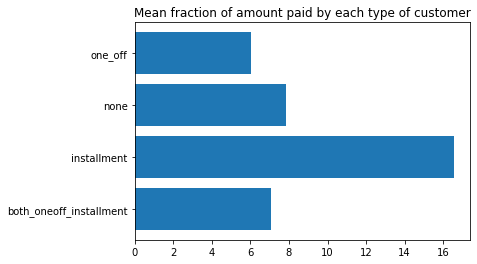

In [27]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean fraction of amount paid by each type of customer')

It can be observed that customers purchasing in installments are paying dues timely.

### Scaling data

In [28]:
# We now will choose some useful feature for our analysis and scale them

df_drop = df.drop(columns=['Balance_Change', 'Purchase_Type','Fraction_of_amount_paid', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES'])

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_drop.columns
#df_scaled.head()
df_scaled

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,Utilization.Ratio(%)
0,-0.562280,-0.213412,-0.475487,-0.973214,-0.399757,-0.093150,-0.004807
1,-0.028930,-0.276339,-0.475487,1.669605,1.406005,-0.109309,-0.574384
2,1.692868,3.530664,-0.364229,1.669605,-0.057904,0.115622,0.205468
3,1.130666,-0.469316,2.267537,0.278648,0.977848,0.024269,0.725528
4,-0.639480,0.177483,-0.422362,-0.973214,-0.178784,-0.282540,-0.371950
...,...,...,...,...,...,...,...
3995,-0.028423,-0.419906,-0.457570,-0.416831,-0.474878,-0.163493,0.243804
3996,-0.516363,-0.469316,-0.428029,-1.112310,-0.534180,-0.260356,1.328462
3997,-0.713826,-0.280143,-0.475487,0.139552,-0.477807,-0.268487,-0.866174
3998,-0.742824,0.058089,-0.475487,-0.416831,-0.275818,-0.309174,-0.888701


# C. Cluster Analysis <a class="anchor" id="C"></a> 


## 6. Step-by-step hierarchical clustering <a class="anchor" id="6"></a>
Write code in Python that goes step-by-step 

In [29]:
#Choose 2 feature 
df_sample = df_scaled.loc[:,['BALANCE', 'CREDIT_LIMIT' ]]
df_sample.head()

,BALANCE,CREDIT_LIMIT
0,-0.562280,-0.973214
1,-0.028930,1.669605
2,1.692868,1.669605
3,1.130666,0.278648
4,-0.639480,-0.973214


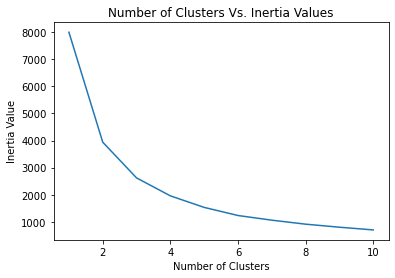

In [30]:
# funtion to find inertia then plot inertia with cluster to find best K 

from sklearn.cluster import KMeans

def inertia_function(data):
    clusters = [1,2,3,4,5,6,7,8,9,10] #list of clusters
    inertia = [] # the inertia values will be stored here later
    for i in clusters:

        #Build a k-means model for each cluster value
        k_means = KMeans(n_clusters = i)
        #Fit the model to the data
        k_means.fit(data)

    # Store inertia values 
        inertia.append(k_means.inertia_)
    
    #plot 
    # Plot the result
    plt.plot(clusters, inertia)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia Value')
    plt.title('Number of Clusters Vs. Inertia Values')
    plt.show()
    return None 
inertia_function(df_sample)

In [31]:
from sklearn.metrics.pairwise import euclidean_distances
distance_df = pd.DataFrame(euclidean_distances(df_sample)) #Euclidean Distance stored in a datafrane type
distance_df.astype(int)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,0,2,3,2,0,1,0,0,4,2,...,0,4,0,0,0,0,0,1,0,1
1,2,0,1,1,2,2,2,1,3,0,...,2,1,2,2,2,2,2,1,2,2
2,3,1,0,1,3,2,2,2,1,2,...,2,2,3,3,3,2,3,2,3,2
3,2,1,1,0,2,0,1,1,1,2,...,1,3,1,2,1,1,2,1,1,0
4,0,2,3,2,0,1,0,0,4,2,...,0,4,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,2,2,1,0,0,0,0,3,1,...,0,3,0,0,0,0,0,0,0,0
3996,0,2,3,2,0,1,0,0,4,2,...,0,4,0,0,0,0,0,1,0,1
3997,1,1,2,1,1,1,1,0,3,1,...,1,3,0,1,0,0,1,0,0,1
3998,0,2,3,1,0,1,0,0,3,1,...,0,3,0,0,0,0,0,0,0,1


In [32]:
#taking the average between the points to to compare two clusters.
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
compare_cluster = linkage(distance_df, 'average') 

<ipython-input-32-d630db2f85ff>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  compare_cluster = linkage(distance_df, 'average')


## 7. Dendrogram <a class="anchor" id="7"></a>


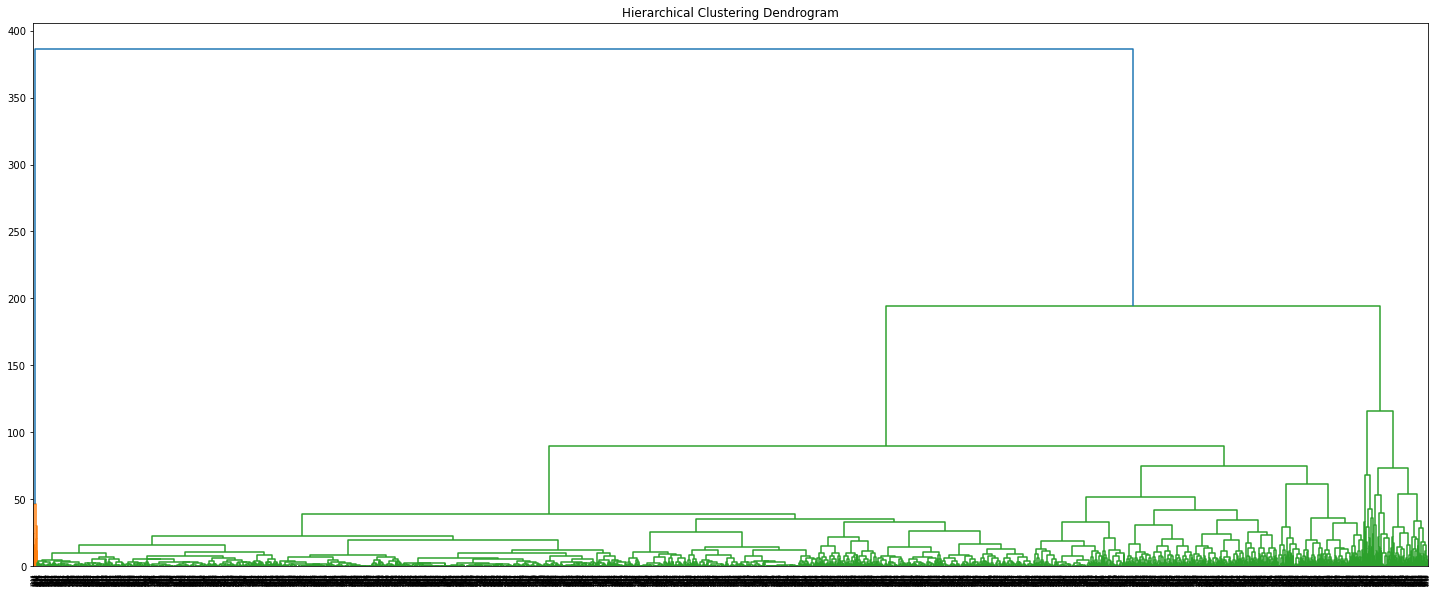

In [33]:
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dn = dendrogram(compare_cluster)
plt.show()

From this dendrogram we would choose K=3.

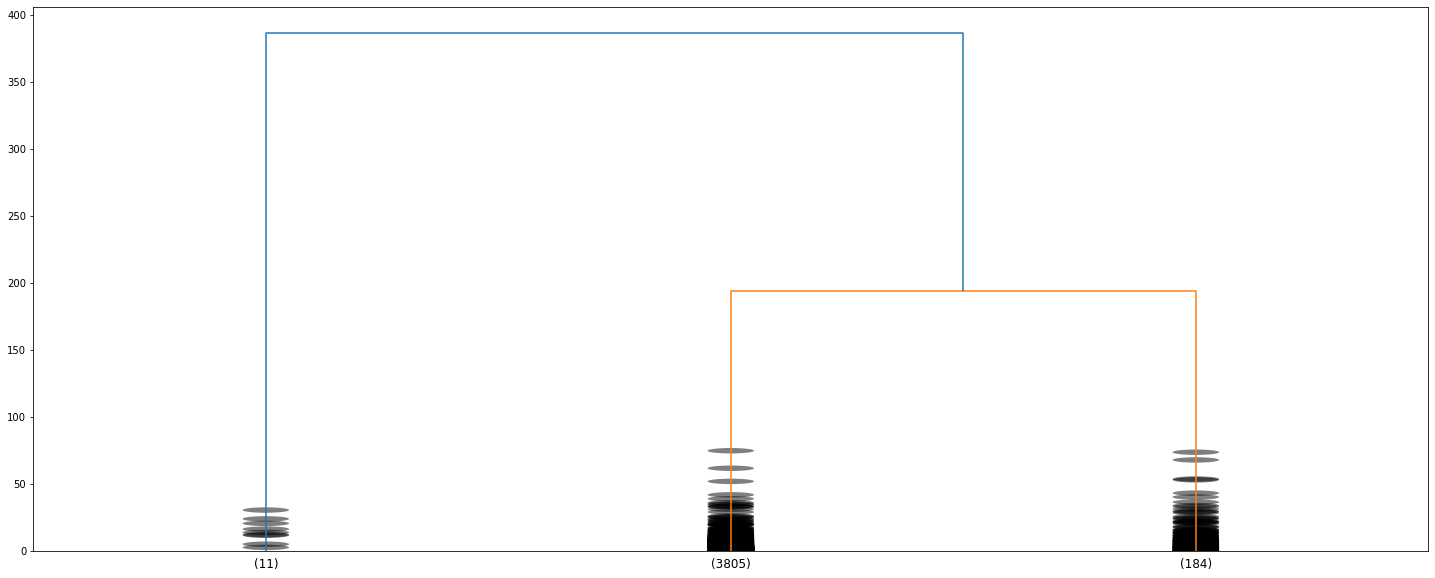

In [34]:
## let see minimized dendrogram k = 3
plt.figure(figsize=(25,10))
dend = dendrogram(compare_cluster, truncate_mode="lastp", p = 3, show_leaf_counts= True, show_contracted= True) 

There will be three clusters:
    - First cluster with 11 users
    - Sencond cluster with 3805 users
    - Third cluster with 184 users
We can see that cluster 2nd and 3rd have closer behavior comparing to the first one when we consider the **BALANCE** and  **CREDIT_LIMIT** features.

# D. Unsupervised Clustering<a class="anchor" id="D"></a>


## 8. Step-by-step K-means<a class="anchor" id="8"></a>


### Build the K-means function
for 2D data
- step1. Select numbers of cluster ,K (done).
- step2. Initialize centroids.
- step3. Calculate the distance from points to each centroid and Assign all the point to the closet centroid
- step4. Recalculate centroids of the new clusters
- step5. Repeat step3-4 Untill the change 
- step6. plot (optionnal)


In [35]:
#step2. Initialize centroids 
'''
input: 
    k(in): the number of cluster
    data: dataset as array
output: 
    array of k unique initial centroids.

'''
def Initialize_centroids(k, data): 
    centroids = []
    for i in range(k):
        #return samples from the parameterized uniform distribution.
        x = np.random.uniform(min(data[:,0]), max(data[:, 0])) 
        y = np.random.uniform(min(data[:,1]), max(data[:, 1])) 
        centroids.append([x, y])

    return np.array(centroids)


In [36]:
#step3. Assign all the point to the closet centroid

def Euclidean_distance(point, centroid):
    return np.sqrt(sum(np.square(point-centroid)))

def association(k, data, array_centroids):
    cluster = [-1]*len(data)
    
    for i in range(len(data)):
        distance_arr = [] #initialize distance array
        
        for j in range(k):
            distance_arr.append(Euclidean_distance(data[i], array_centroids[j])) #Returns the indices of the minimum values along an axis.
        index_ofMin_dist = np.argmin(distance_arr)
        cluster[i] = index_ofMin_dist
    return np.array(cluster)

In [37]:
#step4. Recentering centroids of the new clusters

def re_centroids(k, data, cluster):
    new_centroid = []
    for i in range(k):
        a = []
        for j in range(len(data)):
            if cluster[j]==i:
                a.append(data[j])
        new_centroid.append(np.mean(a, axis=0))
        
    return np.array(new_centroid)

In [38]:
#step 5: calculating the Sum of the distance between previous centroids to the new centroids, prepare for the loop
def change_Ofcentroids(old_centroid, new_centroid):
    sum_change = 0
    for i,j in zip(old_centroid, new_centroid):
        sum_change = sum_change + Euclidean_distance(i, j)
    return sum_change

In [39]:
#step6. plot 

def plot_clusters(data, cluster, array_centroids):
    df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=cluster))
    colors = {0:'green', 1:'orange', 2:'lightblue'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(array_centroids[:, 0], array_centroids[:, 1], marker='o', s=300, c='#ff2222')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [40]:
#Combine all the step functions to have k_means() function:
""" K-means function
input: 
    k(in): the number of cluster
    data: like array dataset 
------------
output: 
array of cluster
plot of every step.

"""
def k_means(k, data):
    old_centroid = Initialize_centroids(k, data) #step2 
    cluster = [0]*len(data) #initialize an array of 0, len of data to store cluster later
    distance = 500 #stoping criteria 
    tol = 0.001
    
    while distance > tol:
        cluster = association(k, data, old_centroid) #step3. Assign all the point to the closet centroid
        plot_clusters(data, cluster, old_centroid) #plot clusters
        new_centroid = re_centroids(k, data, cluster) #step3. recentering
        distance = change_Ofcentroids(old_centroid, new_centroid) #distance (new centroids, old centroids)
        old_centroid = new_centroid #replace the old centroid with the new one 
    return cluster


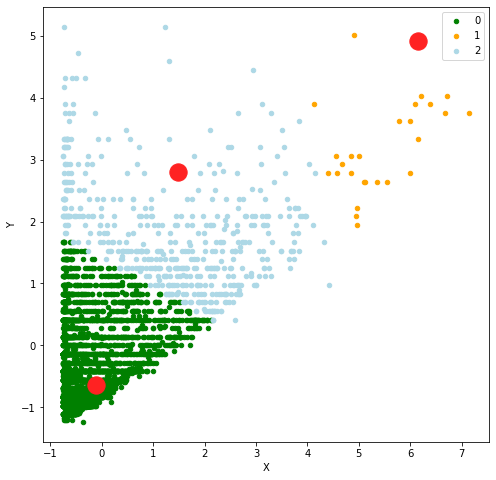

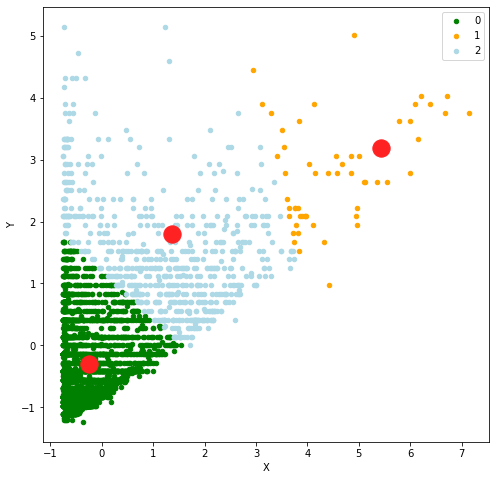

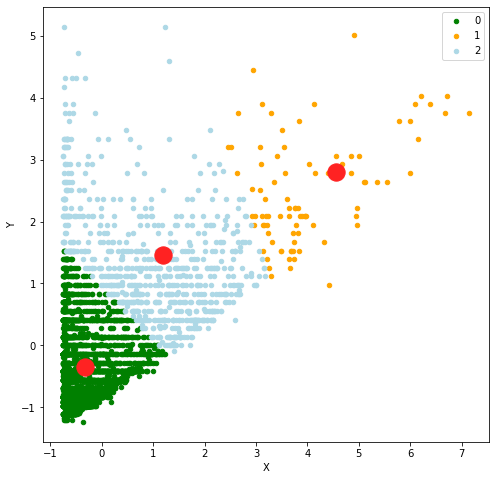

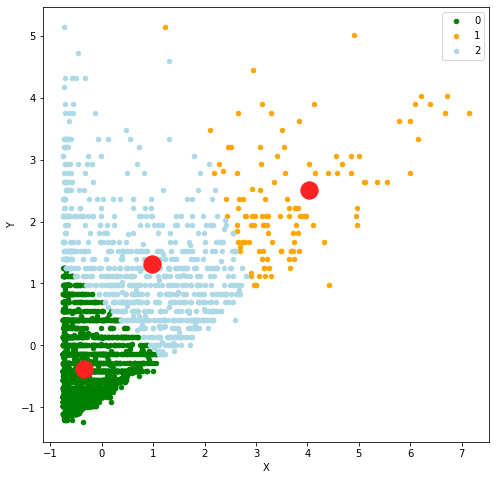

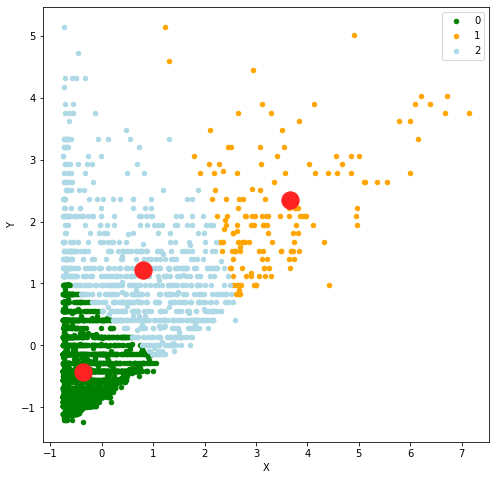

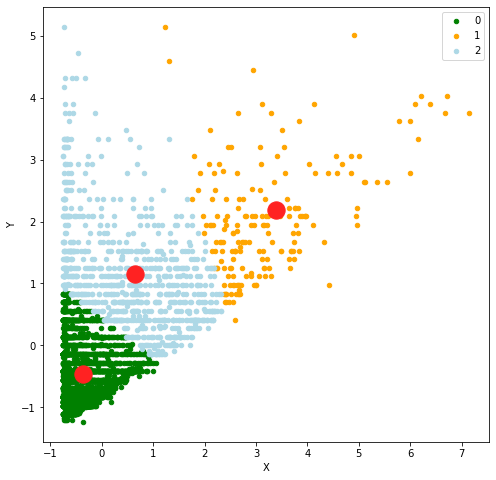

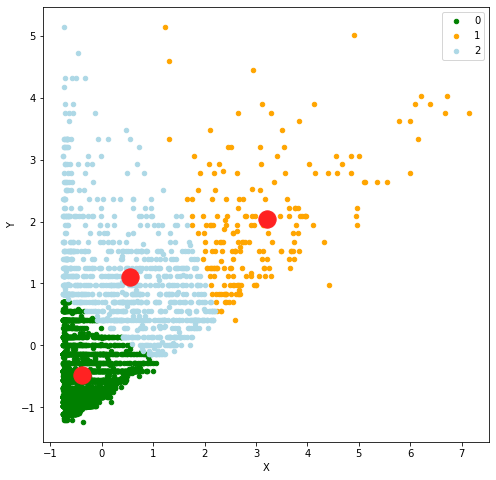

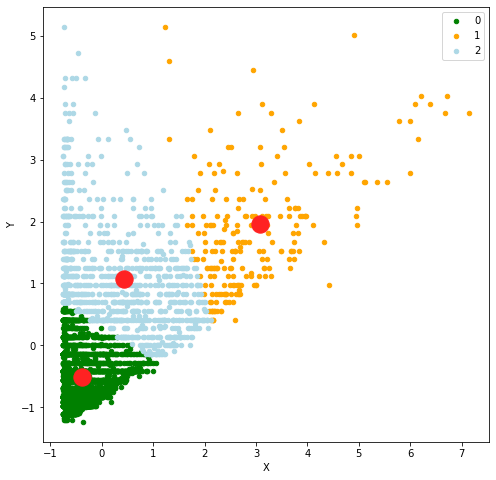

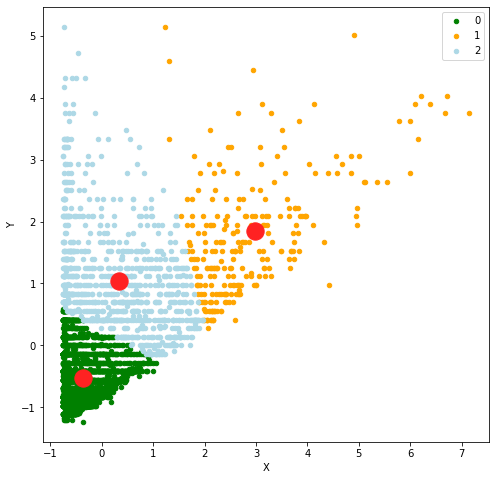

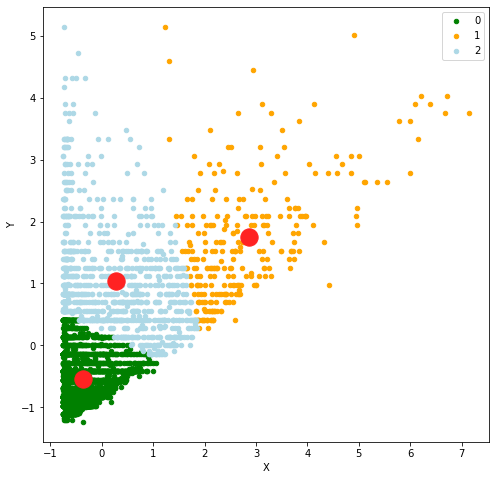

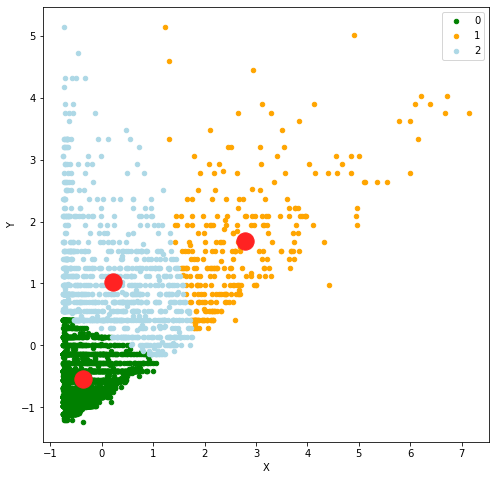

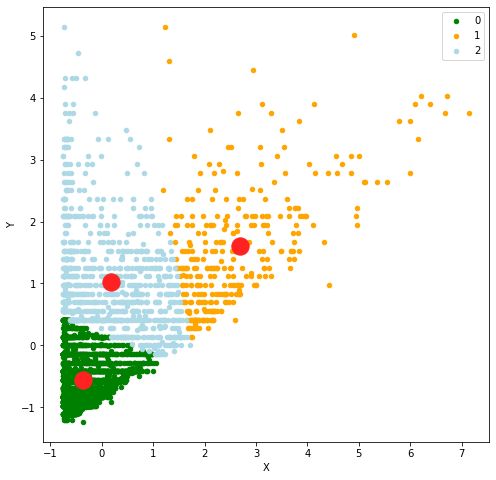

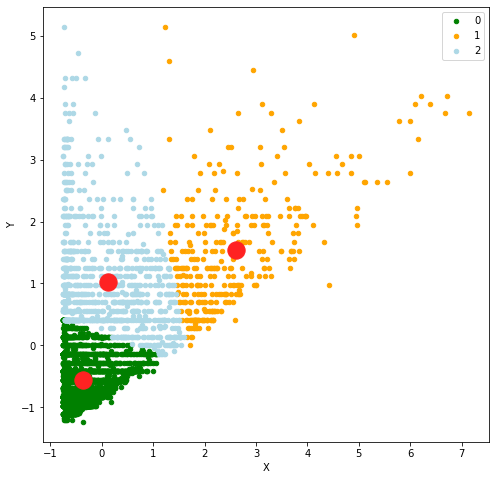

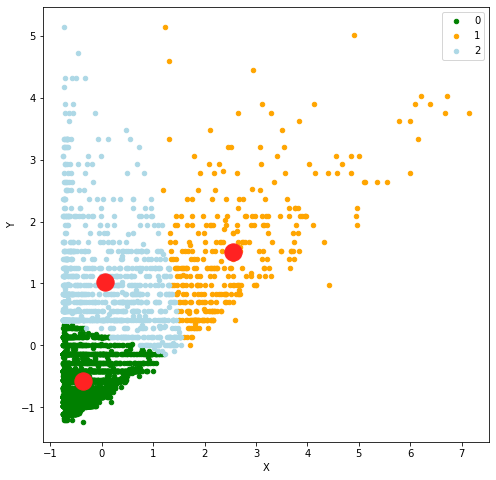

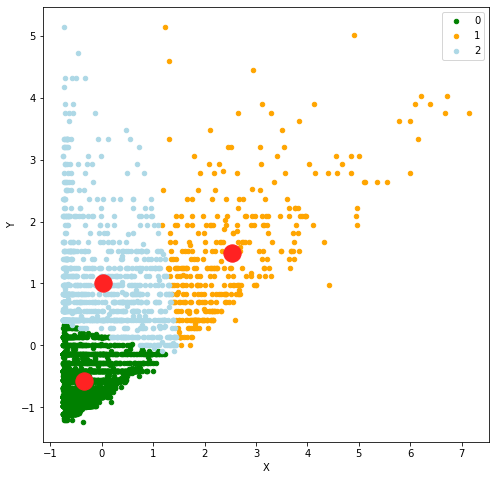

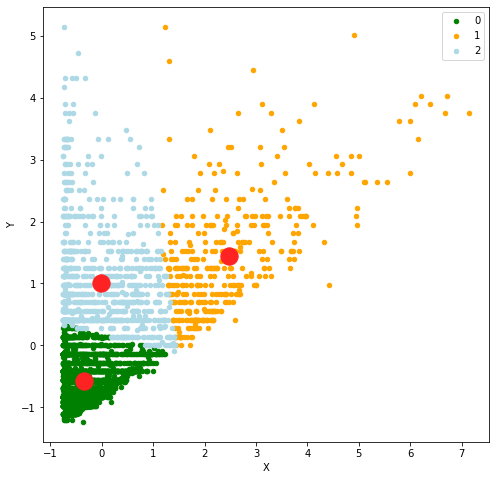

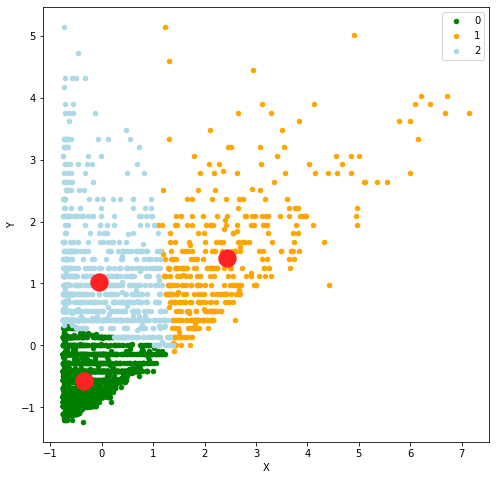

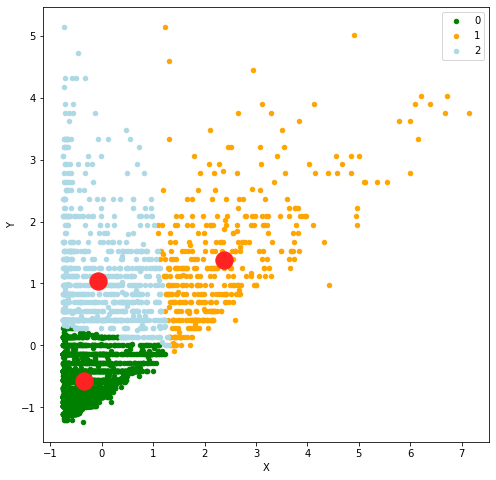

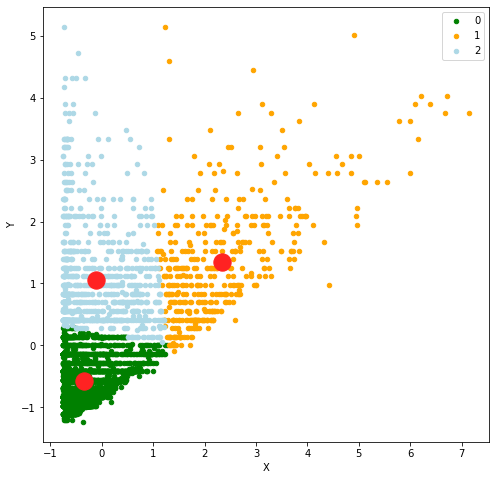

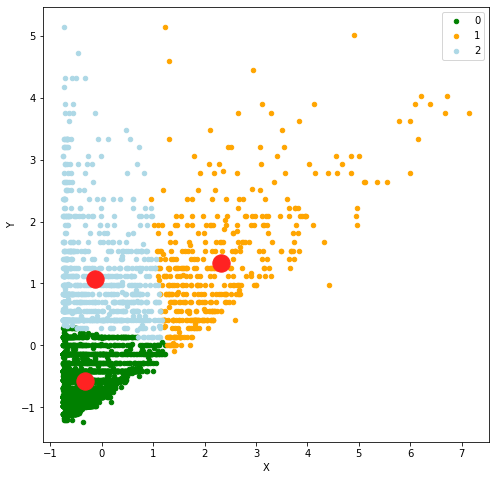

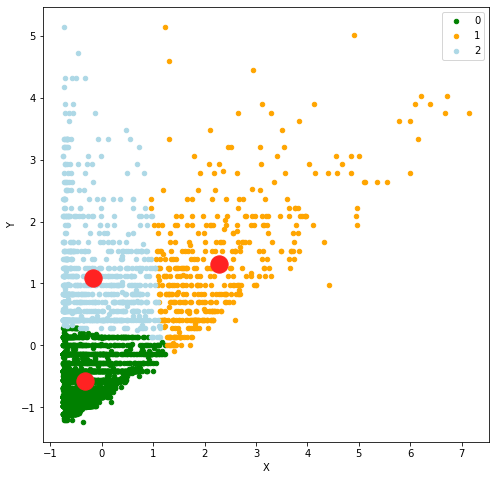

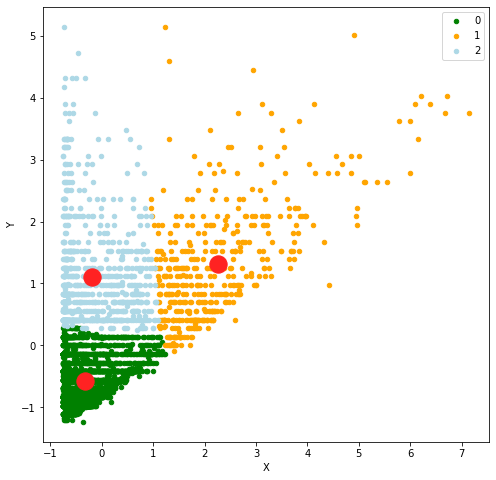

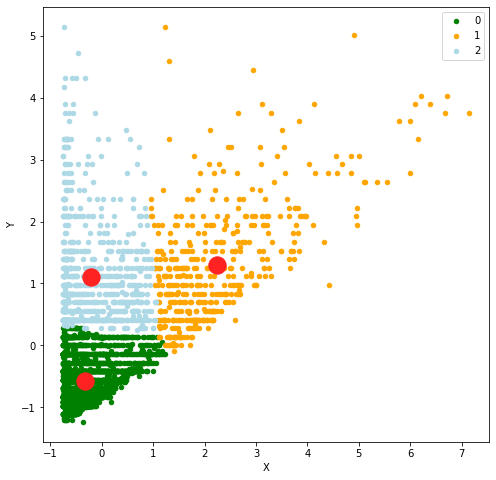

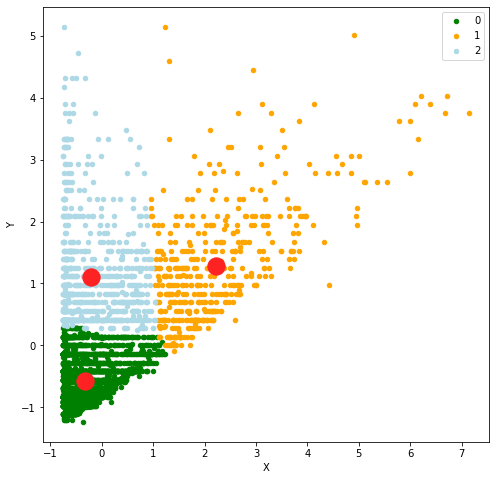

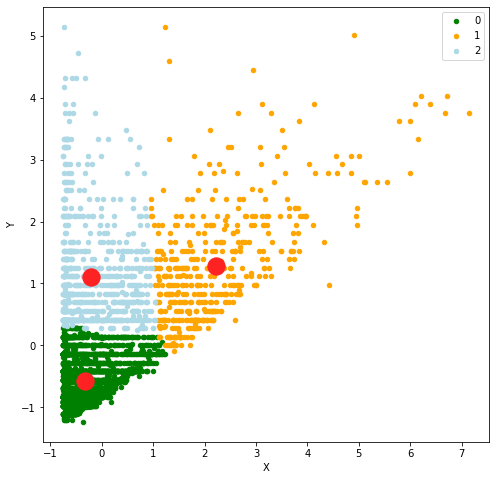

array([0, 2, 1, ..., 0, 0, 0])

In [41]:
#applying our k_means()
d = df_sample.values
k_means(3,d)

## 9. sklearn.cluster<a class="anchor" id="9"></a>
Run again unsupervised knn clusters, but this time using the sklearn.cluster library.

In [42]:
# K Means Cluster using sklearn.cluster 
model1 = KMeans(n_clusters=3)
model1.fit(df_sample)

KMeans(n_clusters=3)

In [43]:
model1.labels_

array([0, 1, 2, ..., 0, 0, 0], dtype=int32)

In [44]:
centroid = model1.cluster_centers_
centroid

array([[-0.33014246, -0.5696342 ],
       [-0.21413082,  1.11047657],
       [ 2.21154272,  1.28888375]])

In [45]:
y_predict = model1.fit_predict(df_sample)
df_sample['cluster'] = y_predict
df_sample

,BALANCE,CREDIT_LIMIT,cluster
0,-0.562280,-0.973214,2
1,-0.028930,1.669605,0
2,1.692868,1.669605,1
3,1.130666,0.278648,1
4,-0.639480,-0.973214,2
...,...,...,...
3995,-0.028423,-0.416831,2
3996,-0.516363,-1.112310,2
3997,-0.713826,0.139552,2
3998,-0.742824,-0.416831,2


Text(0.5, 0, 'Credit limit ')

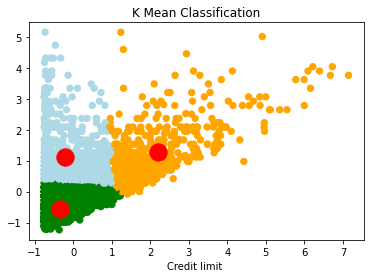

In [46]:
#plot classifications
# Set the size of the plot
fig = plt.figure(figsize=(6, 4))
 
# Create a colormap
colormap = np.array([ 'lightblue', 'orange',  'green','magenta','black'])

#plot cluster
plt.scatter(df_sample.iloc[:, 0], df_sample.iloc[:,1], c = colormap[model1.labels_], s=40)

#plot centroids
plt.scatter(centroid[0][0], centroid[0][1] ,marker='o', s=300, color ='red')
plt.scatter(centroid[1][0], centroid[1][1] ,marker='o', s=300, color ='red')
plt.scatter(centroid[2][0], centroid[2][1] ,marker='o', s=300, color ='red')

plt.title('K Mean Classification')
plt.xlabel('Balances')
plt.xlabel('Credit limit ')

### Using more features For Kmeans using sklearn: 


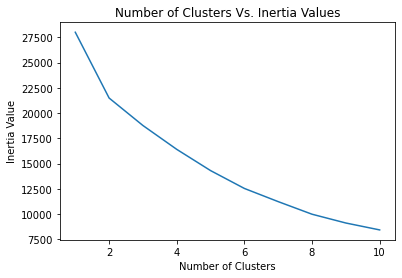

In [47]:
#recall the inertial_function and find K for new dataset-more features
inertia_function(df_scaled)

Form this plot, we choose K = 3. 

In [48]:
#k = 2
model2 = KMeans(n_clusters=2) 
y_pred = model2.fit_predict(df_scaled)

#using seaborn to visualize
#df_scaled["cluster"] = y_pred
cols = list(df_scaled.columns)

#sns.pairplot( df_scaled[cols], hue="cluster")
model2.cluster_centers_

#Combine the clusters labels to our original dataframe the one that has not been scared yet

df_drop["cluster"] = y_pred
df_drop.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,Utilization.Ratio(%),cluster
CUST_ID,,,,,,,,
C17580,384.803407,549.00,0.000000,1000.0,569.597465,610.732047,38.480341,0
C10289,1473.495809,414.00,0.000000,10500.0,5863.940340,570.250342,14.033293,0
C14417,4988.093733,8581.29,225.473003,10500.0,1571.883000,1133.733957,47.505655,1
C17426,3840.505780,0.00,5558.961557,5500.0,4608.621771,904.882748,69.827378,1
C19097,227.220411,1387.60,107.660394,1000.0,1217.473837,136.283049,22.722041,0


In [99]:
df_drop.columns

Index(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'Utilization.Ratio(%)', 'cluster'],
      dtype='object')

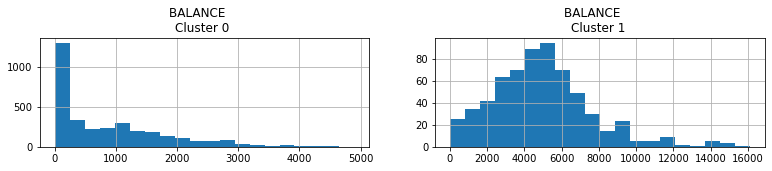

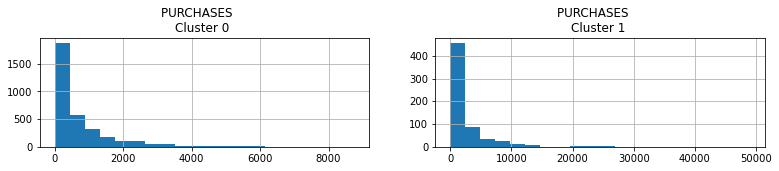

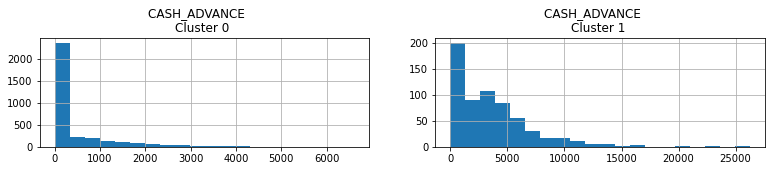

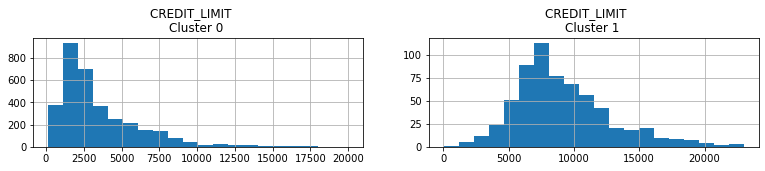

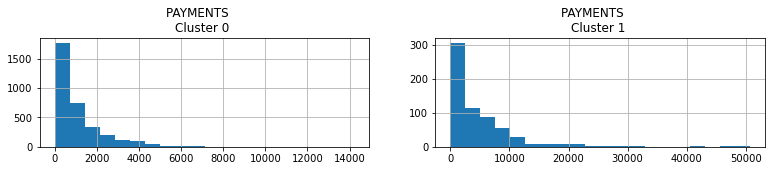

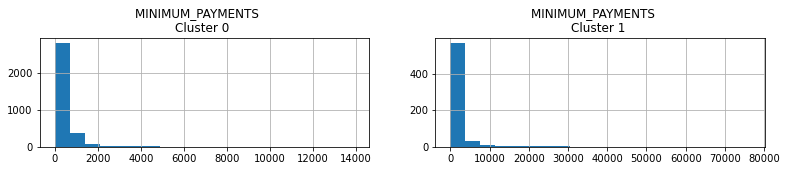

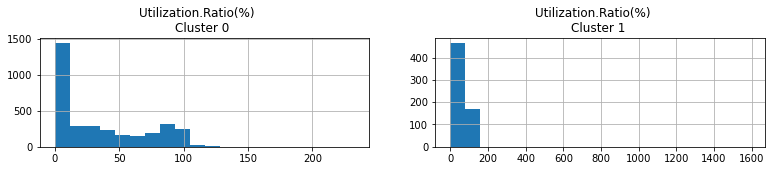

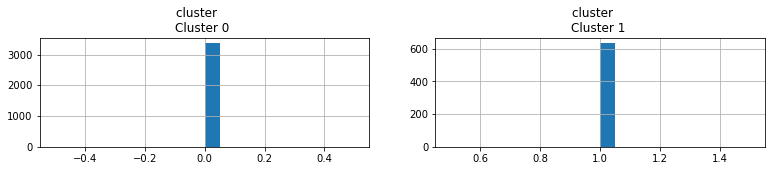

In [49]:
# Plot the histogram of 2 clusters
for i in df_drop.columns:
  plt.figure(figsize = (13, 2))
  for j in range(2):
    plt.subplot(1,2,j+1)
    cluster = df_drop[df_drop['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
    #plt.ylim(0, 1000)
  
  plt.show()

 We can see that Cluster 0 is the majority, around 3300 users, and cluster 1 includes around  700 users. Using this plot to get the insight of the two cluster horizontally, such as the maximun and minimum amount of each feature are shown by following table

| Tables          |      Cluster 0 |  Cluster 1   |
|:--------------- |:-------------: |:-------------:|
| Balance          |  0 - \$4,500     |  0 - \$16,000 |
| Purchase        |  0 - \$6,000     |  0 - \$27,000  |
| Cash Advance    |  0 - \$4,500     |  0 - \$27,000 |
| Credit limit    |  0 - \$17,500   |  0 - \$23,000 |
| Payment         |  0 - \$8,000     |  0 - \$50,000 |
| Minimim payment |  0 - \$5,000     |  0 - \$30,000 |
|Utilization      |  0 - 120      |  0 - 200    |



### Let's look at our clusters vertically by mean values features:

Mean value provides a good indication of the distribution of data. So we are finding mean value for each variable for 2 clusters. 
- First of all, I will group all the features by cluster 0, 1
- Then, I calculate the mean values of them to see the difference between the two clusters. 

In [50]:
#goupby and mean values
col=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'Utilization.Ratio(%)', 'cluster']
cluster3= df_drop.groupby('cluster').apply(lambda x: x[col].mean()).T #group by cluster, then mean values of them.
cluster3


cluster,0,1
BALANCE,880.215222,4995.889344
PURCHASES,744.029106,2402.137035
CASH_ADVANCE,472.601783,3570.460876
CREDIT_LIMIT,3623.748327,9141.805277
PAYMENTS,1136.636548,4953.772586
MINIMUM_PAYMENTS,501.158163,2664.734782
Utilization.Ratio(%),34.355983,61.678893
cluster,0.000000,1.000000


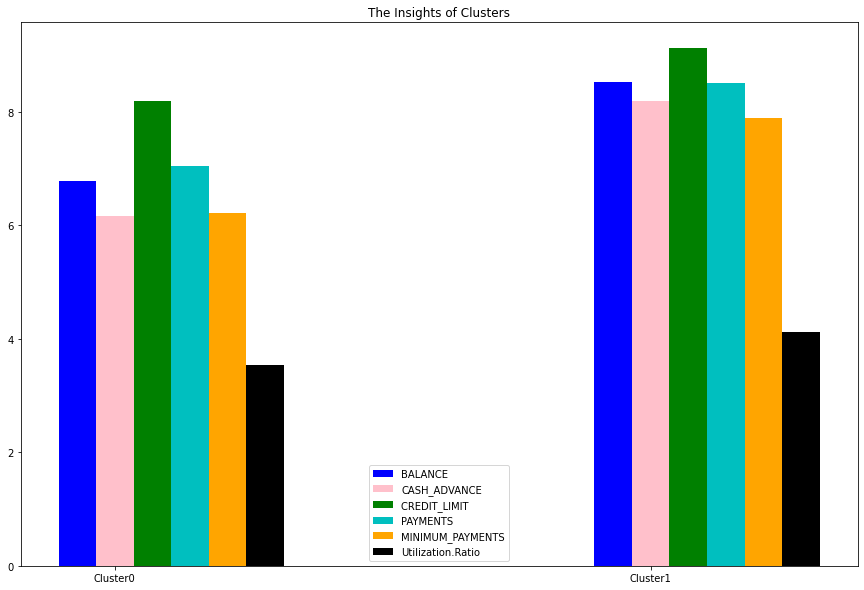

In [51]:
#plot
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster3.columns))

BALANCE = np.log(cluster3.loc['BALANCE',:].values)
CASH_ADVANCE = np.log(cluster3.loc['CASH_ADVANCE',:].values)
CREDIT_LIMIT = np.log(cluster3.loc['CREDIT_LIMIT',:].values)
PAYMENTS = np.log(cluster3.loc['PAYMENTS',:].values)
MINIMUM_PAYMENTS= np.log(cluster3.loc['MINIMUM_PAYMENTS',:].values)
Utilization_ratio = np.log(cluster3.loc['Utilization.Ratio(%)',:].values)

bar_width=.07
b1=plt.bar(index,BALANCE,color='b',label='BALANCE',width=bar_width)
b2=plt.bar(index+bar_width,CASH_ADVANCE,color='pink',label='CASH_ADVANCE',width=bar_width)
b3=plt.bar(index+2*bar_width,CREDIT_LIMIT ,color='g',label='CREDIT_LIMIT ',width=bar_width)
b4=plt.bar(index+3*bar_width,PAYMENTS,color='c',label='PAYMENTS',width=bar_width)
b5=plt.bar(index+4*bar_width,MINIMUM_PAYMENTS,color='orange',label='MINIMUM_PAYMENTS',width=bar_width)
b6=plt.bar(index+5*bar_width,Utilization_ratio,color='k',label='Utilization.Ratio',width=bar_width)


plt.title("The Insights of Clusters")
plt.xticks(index + bar_width, ('Cluster0', 'Cluster1'))
plt.legend()

With the mean values of each feature in each cluster, in general, we obtain  the behaviors of each group: 

-  Cluster 1:  this group has around 700 members. This group of customers which has pretty high utilization ratio, takes the high Cash_Advance, has high balance and makes low minimum payment. High utilization ratio causes the low credit card score(30%). Thus, with this group we can target them make more payment  or providing less interest rate on purchase transaction.


- Cluster 0: this group is the majority of users. This group is performing the better from all because they are maintaining lower balance and lower utilizaton rate. They are doing a good job. Maybe, giving rewards point will make them make more payment. 


# E. Supervised Clustering <a class="anchor" id="E"></a>


## 10. K Nearest Neighbors (kNN)  Function<a class="anchor" id="10"></a>


In [52]:
import operator

class kNN():
    
    def __init__(self, K=3):
        self.K = K

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    
    def predict(self, X_test):
        
        y_predict = []
        
        # loop for test set
        for i in range(len(X_test)):            
            
            # find the distance #use Euclidean_distance() function above
            dist = np.array([Euclidean_distance(X_test[i], x) for x in self.X_train])
            
            # Sort by distance and return indices of the first k neighbors
            k_idx = np.argsort(dist)[:self.K]
            
            # get the neighbors
            neighbor = {}

            # for each neighbor find the class
            for i in k_idx:
                if self.Y_train[i] in neighbor:
                    neighbor[self.Y_train[i]] = 1 + neighbor[self.Y_train[i]]
                else:
                    neighbor[self.Y_train[i]] = 1
            
            sorted_neighbor = sorted(neighbor.items(), key = operator.itemgetter(1), reverse=True)
            
            # store the class label
            y_predict.append(sorted_neighbor[0][0])
        return y_predict
        

In [73]:

from sklearn.model_selection import train_test_split
X = df_drop.loc[:,['BALANCE', 'CREDIT_LIMIT' ]].values
y = df_drop.cluster.values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.05, random_state=180)

model3 = kNN(K=3)
fit = model3.fit(X_train1, y_train1)
y_predict = model3.predict(X_test1)

#print('Accuracy:', accuracy_score(y_test, y_predict))
X_train1

array([[3367.300661, 6500.      ],
       [ 344.543487, 5700.      ],
       [ 306.539753, 6000.      ],
       ...,
       [3078.059784, 6000.      ],
       [  92.887247, 1000.      ],
       [1298.539837, 1500.      ]])

As we can see the acurracy does not change much after 3 times of prediction. It is around 99%

In [97]:
# make prediction
def predictKNN():
    balance = float(input('balance: '))
    CREDIT_LIMIT = float(input('CREDIT_LIMIT: '))
    data_class = model3.predict(np.array([balance, CREDIT_LIMIT]).reshape(1, -1))[0]
    print('Prediction: classification #', data_class)
    return None

In [98]:
predictKNN()

balance: 37373
CREDIT_LIMIT: 2
Prediction: classification # 1


In [68]:
predictKNN()

balance: 2
CREDIT_LIMIT: 3
Prediction: cluster # 0


In [69]:
predictKNN()

balance: 349734.333
CREDIT_LIMIT: 434
Prediction: cluster # 1


In [70]:
predictKNN()

balance: 344.44
CREDIT_LIMIT: 433333.3
Prediction: cluster # 1


In [71]:
predictKNN()

balance: 233
CREDIT_LIMIT: 367
Prediction: cluster # 0


From K Nearest Neighbors, we build a predict function which will help banks to keep tracking easier  which kind of group that a customer belongs to. From that, they can give suitable considerations to each customer. 

# F. Findings <a class="anchor" id="F"></a>


## 11. Project Report<a class="anchor" id="11"></a>


# <font size =18> <center> <span style="color:drak"> Credit Card Customer Segmentation </span> <center> </font>
    
    
From group:
* Shah, Harsh Rajeshkumar
* Ngo, Xuan Thi 

    
To: 
    
**Chase Bank** (USA based) <br>
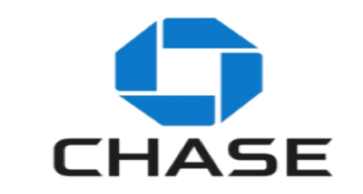

<font size =6>  Introduction  </font>

Credit card data are rich in terms of both volume and variety, providing insights into both customer shopping and payment preferences. Billions and Billions of transactions take place each year, creating billions of opportunities to understand customers better. Surprisingly, many banks don't use this wealth of information. Instead, they opt for mass marketing and costly above-the-line communications.

In this analytical report, customer Segmentation is one of the most fundamental building blocks in getting to know customers. Customer segmentation can be defined as the action of grouping similar customers into categories with the objective of customizing offerings and actions based on their profiles. The output is a list of customers, each tagged with segment flags using a segmentation ‘model’. It is essential for industries where customer interaction is frequent and varied, as each interaction provides insight into opportunities and risks for every individual. The credit card industry is one of them as the industry gains significant ROI from segmentation initiatives.


<font size =6>  Progress of Building Clustering </font>  

We have looked at the data from various perspectives. First, we looked at the data in detail about different variables like purchases, payments and balance and found out their ranges. Then we looked at the Utilization ratio of different customers and got insights about number of customers in different ranges of Credit limit utilization. Moreover, one of the interesting insight was about purchase behaviour of different customers. We divided the customers based on whether the customers does purchases in installments or completes in one-time. Finally, we did Customer Segmentation using different clustering algorithms and were succesful in achieving two segments, each comprising customers with similar purchase behaviour.

For more detail, there are some insight of this datasets have been found:

* The percentage of balance change after 6 months: 

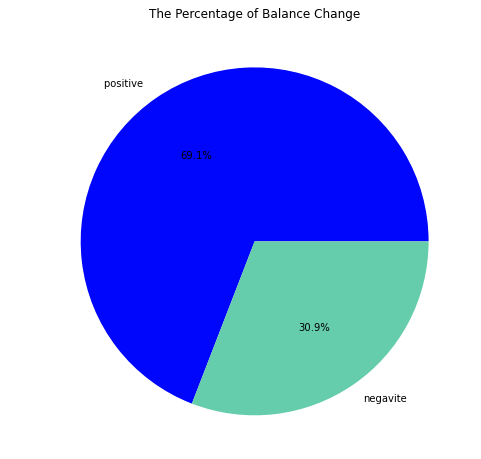

Form the pie chart above, 69.1% positive means that 69.1%  of credit card holders tented to have the **PURCHASES** larger than  **PAYMENTS**  after the 6 months. In contrast, the percentage of users that made **PAYMENTS** larger than perchasing during the 6 months was 30.9%.

* Utilization Ratio:
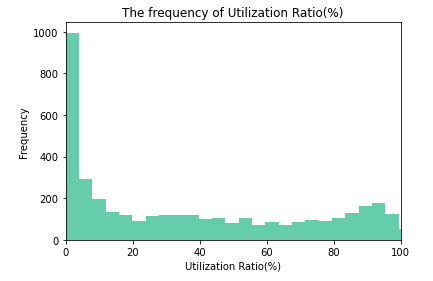

From the preceding plot, we obtain that the highest frequency of Utilization Ratio collected in this dataset belongs to the card holders who have the **Utilization Ratio** from 0 to 10 percent. In other words, around 1000 users had low credit utilization ratio. Moreover, approximately 500 users had high credt utilization, 85%-100%.

* Clustering: Using Kmean algorithm, we found that there are 2 clusters in our dataset. 
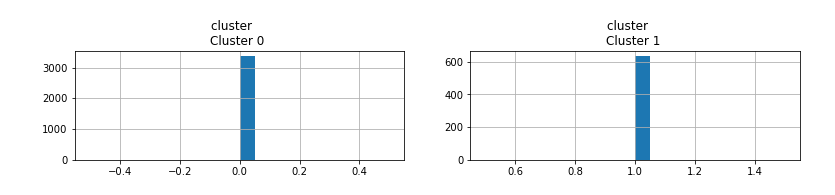

We can see that Cluster 0 is the majority, around 3300 users, and cluster 1 includes around 700 users. Using this plot to get the insight of the two cluster horizontally, such as the maximun and minimum amount of each feature are shown by following table


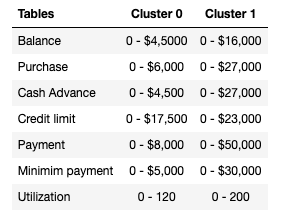


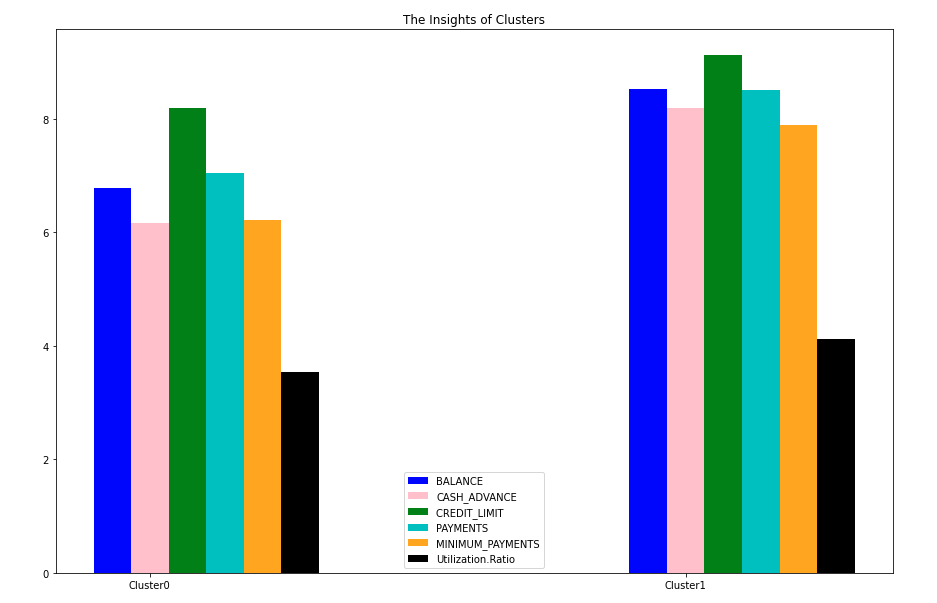

With the mean values of each feature in each cluster, in general, we obtain  the behaviors of each group: 

-  Cluster 1: This group of customers which has pretty high utilization ratio, takes the high Cash_Advance, has high balance and makes low minimum payment. High utilization ratio causes the low credit card score(30%). 

- Cluster 0: This group is the majority of users. This group is performing the better from all because they are maintaining lower balance and lower utilizaton rate. They are doing a good job.

<font size =6>  Results and Discussions </font>

**Segment 1(cluster 0): Financially Smart**
Customers of this segment love to keep their finances in order and dislike having huge debt. They are financially smart and know how to keep credit in check. Issuers can motivate them to use credit card more often for their day to day purchases by offering them occassional rewards. Additionally, issuers can differentiate their cards in such a way that they are easy to use and facilitates financial success. For instance, if a customer makes a large purchase, the credit card should have a feature that divides the amount in low-rate installment loan. This will help overcome customers occassional needs without worrying about debt.

**Segment 2(cluster 1): Financially Stressed**
Customers in this segment carry heavy credit card debt nearly 6 times that of financially smart and 3 times that of average credit card debt, at $4983. They often withdraw high amount of cash and make low minimum payment which results in higher debt. They are unable to control their spending and doubt whether they will get out of burden. The customers in this segment value transparency and simplicity in rates, fees and terms. However, their biggest need is that the issuer allows them to impose their own spending limit so that they can use credit card for large purchases which takes time to repay. However, no bank can entertain this request as they fear customer can default.

In this way, by building a richer, deeper view of customer segments, financial institutions can sharpen their value proposition, increasing the share of wallet and becoming the primary card via identification of high-potential cardholders. They can also selectively upgrade card limits and tiers for maximum return on risk. Additionally, they can retain the most valuable customers by accurately evaluating customer value and attrition risk, guaranteeing long-term satisfaction and loyalty by increasing relevance in communications and offers. This approach helps in rallying business units around a common goal and a single company-wide view of the customer.

# G. Originality <a class="anchor" id="G"></a>

"No other similar published works for clustering found with same dataset"